# Linear Discriminate Analysis ( LDA )

In [ ]:
import numpy as np

In [ ]:
D = np.matrix([[28.11, 0.2, 0.03, 49.54],
               [39.28, 0.3, 0.135, 251.2],
               [188.5, 0.097, 0.396, 4254],
               [250, 2.87, 0.053, 0.22],
               [0.123, 4.88, 0.81, 1.06,],
               [0.34, 22, 0.03, 1.252],
               [0.43, 542, 36, 0.3],
               [1.52, 261, 0.29, 3.71]])

k = 1

# classes -> 1 & 2
# labels should be "1 <= x <= number_of_classes"
label = np.array([1, 1, 1, 2, 2, 2, 2, 2])

# n -> number of rows , d -> number of columns
n, d = D.shape

In [ ]:
# number of classes
C = len(np.unique(label))
C

2

In [ ]:
# mean of all data
m = D.sum(axis=0, dtype='float') / n
m

matrix([[ 63.537875, 104.168375,   4.718   , 570.16025 ]])

In [ ]:
# 1. class-specific subsets
# number of rows that belongs to each class
N_i = np.full((C), 0) # np.full((C, 1), 0)
for i in range(1,C+1):
  N_i[i-1] = len(label[np.where(label == i)[0]])

N_i

array([3, 5])

In [ ]:
# 2. class means
# sum(D(label == 1, :),1) -> sum of columns
# mu_i(:,1) -> a column vector

m_i = np.full((d, C), 0).view(dtype='float', type=np.matrix)
for i in range(0, C):
  m_i[:, i] = (D[np.where(label == i+1)[0], :].sum(axis=0, dtype='float') / N_i[i]).transpose()

m_i

matrix([[8.52966667e+01, 5.04826000e+01],
        [1.99000000e-01, 1.66550000e+02],
        [1.87000000e-01, 7.43660000e+00],
        [1.51824667e+03, 1.30840000e+00]])

In [ ]:
# 3. between-class scatter matrix ( S_B )
S_B = np.full((d, d), 0).view(dtype='int', type=np.matrix)
for i in range(0, C):
  S_B = S_B + N_i[i] * np.matmul(m_i[:,i] - m, (m_i[:,i] - m).transpose())

S_B

matrix([[ 2103304.91289128,  1892017.39152475,  2322158.40222145,
           510687.00128738],
        [ 1892017.39152475,  2037062.05147875,  2097857.74337625,
         -1278039.36830075],
        [ 2322158.40222145,  2097857.74337625,  2664994.91819295,
          -691619.21931845],
        [  510687.00128738, -1278039.36830075,  -691619.21931845,
         23606579.55859628]])

In [ ]:
# 4. center class matrices
# ones(n_i(1),1) -> a column vector consist of '1'
D_bar = np.full((n, d), 0).view(dtype='float', type=np.matrix)
for i in range(0, C):
  D_bar[np.where(label == i+1)[0], :] = D[np.where(label == i+1)[0], :] - \
  np.matmul(np.full((N_i[i], 1), 1).view(dtype='int', type=np.matrix), m_i[:,i].transpose())

D_bar

matrix([[-5.71866667e+01,  1.00000000e-03, -1.57000000e-01,
         -1.46870667e+03],
        [-4.60166667e+01,  1.01000000e-01, -5.20000000e-02,
         -1.26704667e+03],
        [ 1.03203333e+02, -1.02000000e-01,  2.09000000e-01,
          2.73575333e+03],
        [ 1.99517400e+02, -1.63680000e+02, -7.38360000e+00,
         -1.08840000e+00],
        [-5.03596000e+01, -1.61670000e+02, -6.62660000e+00,
         -2.48400000e-01],
        [-5.01426000e+01, -1.44550000e+02, -7.40660000e+00,
         -5.64000000e-02],
        [-5.00526000e+01,  3.75450000e+02,  2.85634000e+01,
         -1.00840000e+00],
        [-4.89626000e+01,  9.44500000e+01, -7.14660000e+00,
          2.40160000e+00]])

In [ ]:
#  5. class scatter matrices

# initializing S_i with zero matrices
S_i = {}
for i in range(0, C):
  S_i['{}'.format(i)] = np.full((d, d), 0).view(dtype='float', type=np.matrix)

for i in range(0, n):
  S_i['{}'.format(label[i] - 1)] = S_i['{}'.format(label[i] - 1)] + \
  np.matmul(D[i,:].transpose() - m_i[:, label[i] - 1], (D[i,:].transpose() - m_i[:, label[i] - 1]).transpose())

S_i

{'0': matrix([[ 1.60387765e+04, -1.52316100e+01,  3.29406700e+01,
           4.24634566e+05],
         [-1.52316100e+01,  2.06060000e-02, -2.67270000e-02,
          -4.08487260e+02],
         [ 3.29406700e+01, -2.67270000e-02,  7.10340000e-02,
           8.68245820e+02],
         [ 4.24634566e+05, -4.08487260e+02,  8.68245820e+02,
           1.12468528e+07]]),
 '1': matrix([[ 4.97601615e+04, -4.06840249e+04, -1.84781389e+03,
          -2.68932909e+02],
         [-4.06840249e+04,  2.23706539e+05,  1.33996263e+04,
           7.46881000e+01],
         [-1.84781389e+03,  1.33996263e+04,  1.02022881e+03,
          -3.58665172e+01],
         [-2.68932909e+02,  7.46881000e+01, -3.58665172e+01,
           8.03405120e+00]])}

In [ ]:
# 6. within-class scatter matrix

S_W = np.full((d, d), 0).view(dtype='float', type=np.matrix)
for i in range(0, C):
  S_W = S_W + S_i['{}'.format(i)]

S_W

matrix([[ 6.57989380e+04, -4.06992565e+04, -1.81487322e+03,
          4.24365633e+05],
        [-4.06992565e+04,  2.23706559e+05,  1.33995995e+04,
         -3.33799160e+02],
        [-1.81487322e+03,  1.33995995e+04,  1.02029985e+03,
          8.32379303e+02],
        [ 4.24365633e+05, -3.33799160e+02,  8.32379303e+02,
          1.12468609e+07]])

In [ ]:
# 7.compute eigenvectors
# at leat 'd + C' data point is needed for 'inv(S_W)'

# eigen values and vectors
E, V = np.linalg.eig(np.matmul(np.linalg.inv(S_W), S_B))

# '-1 *' for sorting in descending order
ind = np.argsort(-1 * E)

E = E[ind]
V = V[:,ind]

print("eigen values: ")
print(E)
print("eigen vectors: ")
print(V)

eigen values: 
[ 1.12927856e+04  4.22469512e+00  2.13075970e+00 -1.02058558e-12]
eigen vectors: 
[[ 8.55550049e-03 -5.43953320e-01  7.26091200e-01  8.08962142e-01]
 [ 6.05685995e-02 -3.58508596e-01  9.01650129e-02 -2.20600614e-01]
 [-9.98127341e-01  7.58219176e-01 -6.62017527e-01 -5.43008995e-01]
 [-2.42331339e-04  2.62688569e-02  1.62464254e-01 -4.53525330e-02]]


In [ ]:
# choose k eigenvectors with the largest eigenvalues 
# to form a d×k dimensional matrix W (where every column represents an eigenvector)
W = V[:, 0:k]
W

matrix([[ 8.55550049e-03],
        [ 6.05685995e-02],
        [-9.98127341e-01],
        [-2.42331339e-04]])

In [ ]:
# 8. compute new data points
Y = np.matmul(D, W)
Y

matrix([[ 0.21065992],
        [ 0.15860982],
        [ 0.19245105],
        [ 2.25975294],
        [-0.51211293],
        [ 1.30517084],
        [-3.10079721],
        [15.53105285]])

In [ ]:
def plotResult_LDA(Y, k=None):
  import numpy as np
  import matplotlib.pyplot as plt
  
  if k == None:
    n, d = Y.shape
    k = d

  # plot result
  if k == 1:
    # 1-D plot
    fig1D, ax1D = plt.subplots()
    ax1D.hlines(1, np.amin(Y.real) - 1, np.amax(Y.real) + 1)  # Draw a horizontal line
    plt.xlim(np.amin(Y.real) - 1, np.amax(Y.real) + 1)
    plt.ylim(0.5,1.5)
  
    y = np.ones(np.shape(Y))   # Make all y values the same
    ax1D.plot(Y.real,y,'|',ms = 40)  # Plot a line at each location specified in 'A'
    ax1D.set_title('1-D plot')
    #plt.axis('off')
    plt.show()

  elif k == 2:
    # 2-D plot
    fig2D, ax2D = plt.subplots()
    ax2D.plot(Y.real[:,0], Y.real[:,1], 'o')
    ax2D.grid()
    ax2D.set_title('2-D plot')
    plt.show()

  elif k >= 3:
    # 3-D plot
    fig3D = plt.figure(figsize=(11,11))
    ax3D = fig3D.add_subplot(projection='3d')
    ax3D.scatter(Y.real[:,0], Y.real[:,1], Y.real[:,2], marker=".", s=100)
    ax3D.set_title('3-D plot')
    if k > 3:
      fig3D.suptitle('Only 3 dimensions can be represented')
    #ax3D.view_init(20, 170)
    plt.show()

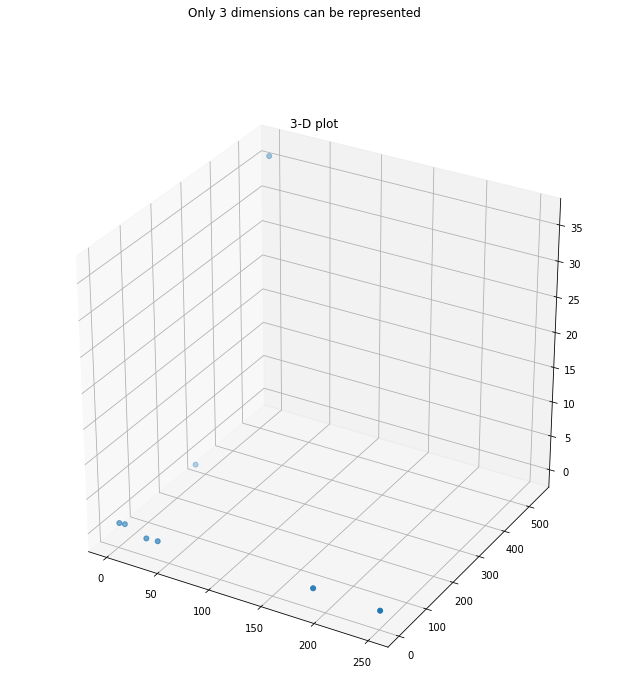

In [ ]:
# Original data
plotResult_LDA(D)

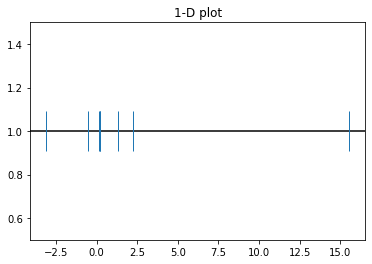

In [ ]:
# Transformed data
plotResult_LDA(Y, k)

In [ ]:
# All in one function
# labels should be "1 <= x <= number_of_classes" ******
def LDA(D, label, k=1):
  import numpy as np

  # convert 'data' to numpy array
  D = np.asarray(D, dtype='float')
  # convert to numpy matrix
  D = D.view(dtype='float', type=np.matrix)

  # n -> number of rows , d -> number of columns
  n, d = D.shape

  # convert 'label' to numpy array
  label = np.asarray(label, dtype='int')

  # number of classes
  C = len(np.unique(label))
  
  # mean of all data
  m = D.sum(axis=0, dtype='float') / n

  # 1. class-specific subsets
  # number of rows that belongs to each class
  N_i = np.full((C), 0) # np.full((C, 1), 0)
  for i in range(1,C+1):
    N_i[i-1] = len(label[np.where(label == i)[0]])

  # 2. class means
  # sum(D(label == 1, :),1) -> sum of columns
  # mu_i(:,1) -> a column vector
  m_i = np.full((d, C), 0).view(dtype='float', type=np.matrix)
  for i in range(0, C):
    m_i[:, i] = (D[np.where(label == i+1)[0], :].sum(axis=0, dtype='float') / N_i[i]).transpose()

  # 3. between-class scatter matrix ( S_B )
  S_B = np.full((d, d), 0).view(dtype='int', type=np.matrix)
  for i in range(0, C):
    S_B = S_B + N_i[i] * np.matmul(m_i[:,i] - m, (m_i[:,i] - m).transpose())

  # 4. center class matrices
  # ones(n_i(1),1) -> a column vector consist of '1'
  D_bar = np.full((n, d), 0).view(dtype='float', type=np.matrix)
  for i in range(0, C):
    D_bar[np.where(label == i+1)[0], :] = D[np.where(label == i+1)[0], :] - \
    np.matmul(np.full((N_i[i], 1), 1).view(dtype='int', type=np.matrix), m_i[:,i].transpose())

  #  5. class scatter matrices

  # initializing S_i with zero matrices
  S_i = {}
  for i in range(0, C):
    S_i['{}'.format(i)] = np.full((d, d), 0).view(dtype='float', type=np.matrix)

  for i in range(0, n):
    S_i['{}'.format(label[i] - 1)] = S_i['{}'.format(label[i] - 1)] + \
    np.matmul(D[i,:].transpose() - m_i[:, label[i] - 1], (D[i,:].transpose() - m_i[:, label[i] - 1]).transpose())

  # 6. within-class scatter matrix
  S_W = np.full((d, d), 0).view(dtype='float', type=np.matrix)
  for i in range(0, C):
    S_W = S_W + S_i['{}'.format(i)]

  # 7.compute eigenvectors
  # at leat 'd + C' data point is needed for 'inv(S_W)'

  # eigen values and vectors
  E, V = np.linalg.eig(np.matmul(np.linalg.inv(S_W), S_B))

  # '-1 *' for sorting in descending order
  ind = np.argsort(-1 * E)

  E = E[ind]
  V = V[:,ind]

  # choose k eigenvectors with the largest eigenvalues 
  # to form a d×k dimensional matrix W (where every column represents an eigenvector)
  W = V[:, 0:k]

  # 8. compute new data points
  Y = np.matmul(D, W)

  # Original data
  print("Original Data")
  plotResult_LDA(D)

  # Transformed data
  print("Transformed Data")
  plotResult_LDA(Y, k)

  return Y, W, E, V, S_W, S_i, D_bar, S_B, m_i, N_i, m, C

Original Data


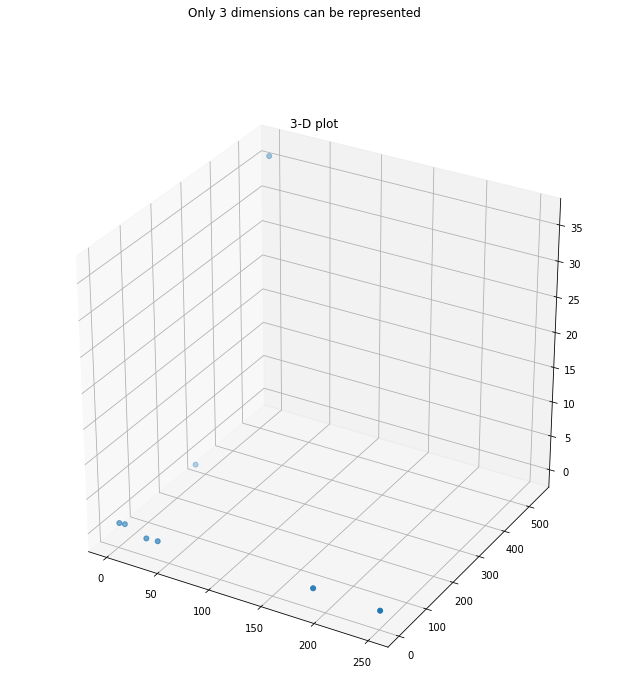

Transformed Data


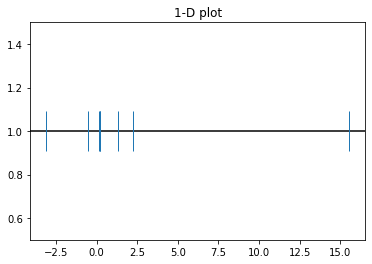

In [ ]:
Y, W, E, V, S_W, S_i, D_bar, S_B, m_i, N_i, m, C = LDA(D, label, k=k)

In [ ]:
print("\"number of classes\"")
print(C)
print("\n\"mean of all data\"")
print(m)
print("\n\"class-specific subsets\"")
print(N_i)
print("\n\"class means\"")
print(m_i)
print("\n\"between-class scatter matrix\"")
print(S_B)
print("\n\"center class matrices\"")
print(D_bar)
print("\n\"class scatter matrices\"")
print(S_i)
print("\n\"within-class scatter matrix\"")
print(S_W)
print("\n\"eigen values\"")
print(E)
print("\n\"eigen vectors\"")
print(V)
print("\n\" \'k\' eigenvectors with the largest eigenvalues\"")
print(W)
print("\n\"new data points\"")
print(Y)

"number of classes"
2

"mean of all data"
[[ 63.537875 104.168375   4.718    570.16025 ]]

"class-specific subsets"
[3 5]

"class means"
[[8.52966667e+01 5.04826000e+01]
 [1.99000000e-01 1.66550000e+02]
 [1.87000000e-01 7.43660000e+00]
 [1.51824667e+03 1.30840000e+00]]

"between-class scatter matrix"
[[ 2103304.91289128  1892017.39152475  2322158.40222145   510687.00128738]
 [ 1892017.39152475  2037062.05147875  2097857.74337625 -1278039.36830075]
 [ 2322158.40222145  2097857.74337625  2664994.91819295  -691619.21931845]
 [  510687.00128738 -1278039.36830075  -691619.21931845 23606579.55859628]]

"center class matrices"
[[-5.71866667e+01  1.00000000e-03 -1.57000000e-01 -1.46870667e+03]
 [-4.60166667e+01  1.01000000e-01 -5.20000000e-02 -1.26704667e+03]
 [ 1.03203333e+02 -1.02000000e-01  2.09000000e-01  2.73575333e+03]
 [ 1.99517400e+02 -1.63680000e+02 -7.38360000e+00 -1.08840000e+00]
 [-5.03596000e+01 -1.61670000e+02 -6.62660000e+00 -2.48400000e-01]
 [-5.01426000e+01 -1.44550000e+02 -7.